In [1]:
import pandas as pd

In [2]:
train_data = pd.read_csv('./TTPFShot-training-data.csv')

article_data = pd.read_csv("./df_reports_classification_CISA-77-new-artikel-RAW-backup.csv")


In [3]:
train_data

,Key,Value
0,T1094,Some Software variants use raw TCP for C2.
1,T1047,Software leverages WMI to enumerate anti-virus...
2,T1003.001,Software contains an implementation of Softwar...
3,T1614.001,Attacker has used implants to collect the syst...
4,T1587.001,For Software modular backdoor.
...,...,...
19742,T1045,Most decompression techniques decompress the e...
19743,T1059.001,Software uses PowerShell to download and execu...
19744,T1059.003,Software can use `cmd.exe` to execute a create...
19745,T1112,Software has functionality to remove Registry ...


<AxesSubplot: xlabel='Key'>

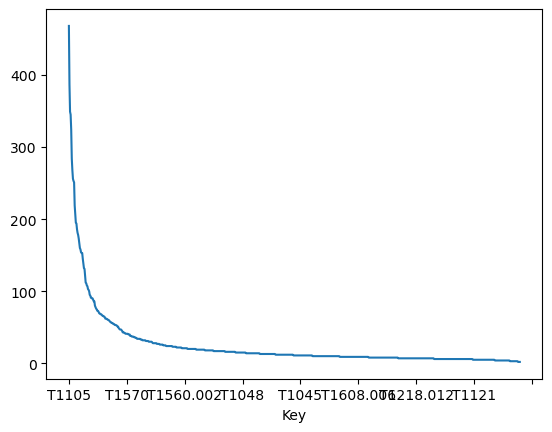

In [4]:
train_data.Key.value_counts().plot()

<AxesSubplot: xlabel='Key'>

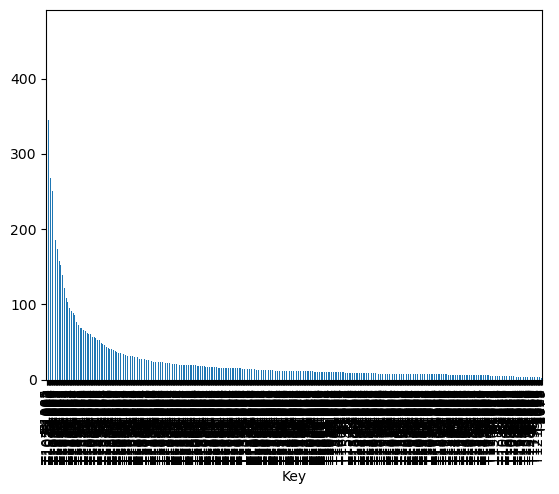

In [5]:
train_data.Key.value_counts().plot(kind="bar")

### Important Keys

In [6]:
important_key_treshold = 50

In [7]:
# Count the number of values per key
key_value_counts = train_data.groupby("Key").size().reset_index(name="ValueCount")

# Filter keys with more than 50 values
important_keys = key_value_counts[key_value_counts["ValueCount"] >= important_key_treshold]

# Display the result
important_keys

,Key,ValueCount
6,T1003.001,80
15,T1005,208
17,T1007,66
18,T1008,53
23,T1012,112
...,...,...
629,T1573.001,158
630,T1573.002,76
633,T1574.002,67
653,T1583.001,58


In [8]:
# Extract base keys
important_keys["BaseKey"] = important_keys["Key"].apply(lambda x: x.split('.')[0])

/tmp/ipykernel_1122909/4205610442.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  important_keys["BaseKey"] = important_keys["Key"].apply(lambda x: x.split('.')[0])


In [9]:
important_keys

,Key,ValueCount,BaseKey
6,T1003.001,80,T1003
15,T1005,208,T1005
17,T1007,66,T1007
18,T1008,53,T1008
23,T1012,112,T1012
...,...,...,...
629,T1573.001,158,T1573
630,T1573.002,76,T1573
633,T1574.002,67,T1574
653,T1583.001,58,T1583


In [10]:
important_keys.BaseKey.value_counts()

BaseKey
T1059    6
T1027    4
T1070    3
T1036    3
T1071    2
        ..
T1102    1
T1105    1
T1005    1
T1112    1
T1588    1
Name: count, Length: 64, dtype: int64

In [11]:
important_keys.BaseKey.values

array(['T1003', 'T1005', 'T1007', 'T1008', 'T1012', 'T1016', 'T1018',
       'T1021', 'T1021', 'T1027', 'T1027', 'T1027', 'T1027', 'T1033',
       'T1036', 'T1036', 'T1036', 'T1041', 'T1043', 'T1046', 'T1047',
       'T1049', 'T1053', 'T1055', 'T1055', 'T1056', 'T1057', 'T1059',
       'T1059', 'T1059', 'T1059', 'T1059', 'T1059', 'T1070', 'T1070',
       'T1070', 'T1071', 'T1071', 'T1074', 'T1078', 'T1082', 'T1083',
       'T1087', 'T1087', 'T1090', 'T1095', 'T1102', 'T1105', 'T1106',
       'T1112', 'T1113', 'T1119', 'T1120', 'T1124', 'T1132', 'T1135',
       'T1140', 'T1189', 'T1190', 'T1203', 'T1204', 'T1204', 'T1218',
       'T1486', 'T1497', 'T1497', 'T1505', 'T1518', 'T1543', 'T1547',
       'T1548', 'T1553', 'T1555', 'T1560', 'T1560', 'T1562', 'T1564',
       'T1564', 'T1566', 'T1566', 'T1569', 'T1573', 'T1573', 'T1574',
       'T1583', 'T1588'], dtype=object)

### Filter Article Data

In [12]:
article_data

,Unnamed: 0.1,Unnamed: 0,RawText,TTP,CleanText,ttpxhunter,ttpfshot_sl,ttpfshot_ml,ttpfshot_zs
0,0,https://www.cisa.gov/news-events/cybersecurity...,\n\n\n\n\n\n\nActions to take today to mitigat...,"{'T1490', 'T1588.002', 'T1048', 'T1555.005', '...",\n\n\n\n\n\n\nActions to take today to mitigat...,"['T1218', 'T1490', 'T1048', 'T1213', 'T1104', ...","{'T1490', 'T1588.002', 'T1598.004', 'T1078.002...","{'T1490', 'T1588.002', 'T1598.004', 'T1078.002...","{'T1490', 'T1552', 'T1048', 'T1620', 'T1563', ..."
1,1,https://www.cisa.gov/news-events/cybersecurity...,\n\n\n\nHow SVR-Attributed Actors are Adapting...,"{'T1528', 'T1110', 'T1090.002', 'T1098.005', '...",\n\n\n\nHow SVR-Attributed Actors are Adapting...,"['T1550', 'T1565', 'T1587', 'T1087', 'T1528', ...","{'T1556.009', 'T1071.001', 'T1591.001', 'T1583...","{'T1591.002', 'T1071.001', 'T1591.001', 'T1480...","{'T1550', 'T1071', 'T1090', 'T1111', 'T1078', ..."
2,2,https://www.cisa.gov/news-events/cybersecurity...,\n\n\n\n\n\n\nActions to take today to mitigat...,"{'T1021', 'T1083', 'T1078.002', 'T1021.002', '...",\n\n\n\n\n\n\nActions to take today to mitigat...,"['T1550', 'T1548', 'T1087', 'T1078', 'T1083', ...","{'T1555.006', 'T1556.009', 'T1078.002', 'T1072...","{'T1555.006', 'T1556.009', 'T1588.002', 'T1078...","{'T1552', 'T1068', 'T1595', 'T1070', 'T1200', ..."
3,3,https://www.cisa.gov/news-events/cybersecurity...,\n\n\n\n\n\n\nActions to take today to mitigat...,"{'T1550', 'T1218', 'T1552', 'T1124', 'T1587.00...",\n\n\n\n\n\n\nActions to take today to mitigat...,"['T1565', 'T1218', 'T1490', 'T1550', 'T1552', ...","{'T1133', 'T1584', 'T1556.007', 'T1059.003', '...","{'T1560.001, T1003.003', 'T1133', 'T1584', 'T1...","{'T1529', 'T0887', 'T1595', 'T1558', 'T1078', ..."
4,4,https://www.cisa.gov/news-events/cybersecurity...,\n\n\n\n\n\n\nActions to take today to mitigat...,"{'T1114', 'T1078', 'T1083', 'T1105', 'T1136', ...",\n\n\n\n\n\n\nActions to take today to mitigat...,"['T1071', 'T1594', 'T1083', 'T1593', 'T1102', ...","{'T1555.006', 'T1552', 'T1071.001', 'T1583.003...","{'T1555.006', 'T1552', 'T1071.001', 'T1584.001...","{'T1552', 'T1006', 'T1578', 'T1070', 'T1071', ..."
...,...,...,...,...,...,...,...,...,...
72,72,https://www.cisa.gov/news-events/cybersecurity...,\n\n\n\n\nSummary\n\nThis joint cybersecurity ...,"{'TA0008', 'T1189', 'T1078', 'T1133', 'TA0003'...",\n\n\n\n\nSummary\n\nThis joint cybersecurity ...,"['T1550', 'T1565', 'T1049', 'T1021', 'T1528', ...","{'T1078.002', 'T1072', 'T1133', 'T1591.001', '...","{'T1565', 'T1210, T1078', 'T1078.002', 'T1072'...","{'T1133', 'T1563', 'T1505.003', 'T1070', 'T159..."
73,73,https://www.cisa.gov/news-events/cybersecurity...,\n\n\n\n\nSummary\n\nThis Alert uses the MITRE...,"{'T1543.003', 'T1071.001', 'T1059.003', 'T1560...",\n\n\n\n\nSummary\n\nThis Alert uses the MITRE...,"['T1114', 'T1021', 'T1204', 'T1498', 'T1213', ...","{'T1588.002', 'T1071.001', 'T1590.006', 'T1104...","{'T1588.002', 'T1048', 'T1071.001', 'T1590.006...","{'T1071', 'T1566, T1110, T1078, T1021', 'T1588..."
74,74,https://www.cisa.gov/news-events/cybersecurity...,\n\n\n\n\nSummary\n\nThis Alert uses the MITRE...,"{'T1555', 'T1056.001', 'T1564.001', 'T1546.008...",\n\n\n\n\nSummary\n\nThis Alert uses the MITRE...,"['T1204', 'T1498', 'T1480', 'T1531', 'T1587', ...","{'T1056.001', 'T1588.002', 'T1105', 'T1217', '...","{'T1590.006', 'T1120', 'T1036.007', 'T1489', '...","{'T1071', 'T1070', 'T1204', 'T1556', 'T1078', ..."
75,75,https://www.cisa.gov/news-events/cybersecurity...,\n\n\n\n\nSummary\n\nThis Alert uses the MITRE...,"{'T1547.009', 'T1548.002', 'T1071.001', 'T1112...",\n\n\n\n\nSummary\n\nThis Alert uses the MITRE...,"['T1059', 'T1204', 'T1205', 'T1498', 'T1027', ...","{'T1036.007', 'T1489', 'T1021.008', 'T1140', '...","{'T1120', 'T1036.007', 'T1489', 'T1140', 'T103...","{'T1218.010', 'T1059.003', 'T1070', 'T1140', '..."


In [13]:
import ast

# Convert the TTP column from string to a proper Python set
article_data["TTP"] = article_data["TTP"].apply(ast.literal_eval)
article_data["ttpfshot_sl"] = article_data["ttpfshot_sl"].apply(ast.literal_eval)
#article_data["ttpxhunter"] = article_data["ttpxhunter"].apply(ast.literal_eval)

# Create a new column with only base keys
article_data["TTPB"] = article_data["TTP"].apply(lambda ttp_set: {key.split('.')[0] for key in ttp_set})
article_data["ttpfshot_sl_B"] = article_data["ttpfshot_sl"].apply(lambda ttp_set: {key.split('.')[0] for key in ttp_set})

In [14]:
article_data

,Unnamed: 0.1,Unnamed: 0,RawText,TTP,CleanText,ttpxhunter,ttpfshot_sl,ttpfshot_ml,ttpfshot_zs,TTPB,ttpfshot_sl_B
0,0,https://www.cisa.gov/news-events/cybersecurity...,\n\n\n\n\n\n\nActions to take today to mitigat...,"{T1106, T1133, T1219, T1027.009, T1490, T1003....",\n\n\n\n\n\n\nActions to take today to mitigat...,"['T1218', 'T1490', 'T1048', 'T1213', 'T1104', ...","{T1059, T1204, T1069.002, T1219, T1005, T1070....","{'T1490', 'T1588.002', 'T1598.004', 'T1078.002...","{'T1490', 'T1552', 'T1048', 'T1620', 'T1563', ...","{T1059, T1204, T1106, T1003, T1133, T1219, T11...","{T1059, T1204, T1003, T1518, T1219, T1137, T10..."
1,1,https://www.cisa.gov/news-events/cybersecurity...,\n\n\n\nHow SVR-Attributed Actors are Adapting...,"{T1528, T1621, T1090.002, T1110, T1098.005, T1...",\n\n\n\nHow SVR-Attributed Actors are Adapting...,"['T1550', 'T1565', 'T1587', 'T1087', 'T1528', ...","{T1556.009, T1586.003, T1591.004, T1204.001, T...","{'T1591.002', 'T1071.001', 'T1591.001', 'T1480...","{'T1550', 'T1071', 'T1090', 'T1111', 'T1078', ...","{T1090, T1098, T1528, T1621, T1078, T1110}","{T1204, T1098, T1665, T1591, T1527, T1110, T15..."
2,2,https://www.cisa.gov/news-events/cybersecurity...,\n\n\n\n\n\n\nActions to take today to mitigat...,"{T1133, T1087.002, T1083, T1213.002, T1021.002...",\n\n\n\n\n\n\nActions to take today to mitigat...,"['T1550', 'T1548', 'T1087', 'T1078', 'T1083', ...","{T1484.001, T1556.009, T1098, T1133, T1190, T1...","{'T1555.006', 'T1556.009', 'T1588.002', 'T1078...","{'T1552', 'T1068', 'T1595', 'T1070', 'T1200', ...","{T1133, T1213, T1083, T1552, T1078, T1018, T10...","{T1518, T1098, T1133, T1190, T1068, T1087, T11..."
3,3,https://www.cisa.gov/news-events/cybersecurity...,\n\n\n\n\n\n\nActions to take today to mitigat...,"{T1059, T1003.003, T1518, T1133, T1033, T1120,...",\n\n\n\n\n\n\nActions to take today to mitigat...,"['T1565', 'T1218', 'T1490', 'T1550', 'T1552', ...","{T1059, T1556.009, T1203, T1070.004, T1068, T1...","{'T1560.001, T1003.003', 'T1133', 'T1584', 'T1...","{'T1529', 'T0887', 'T1595', 'T1558', 'T1078', ...","{T1059, T1003, T1518, T1133, T1033, T1120, T11...","{T1059, T1203, T1068, T1087, T1589, T1580, T12..."
4,4,https://www.cisa.gov/news-events/cybersecurity...,\n\n\n\n\n\n\nActions to take today to mitigat...,"{T1027.010, TA0006, T1595.002, T1190, T1083, T...",\n\n\n\n\n\n\nActions to take today to mitigat...,"['T1071', 'T1594', 'T1083', 'T1593', 'T1102', ...","{T1190, T1203, T1596.004, T1608.005, T1070.004...","{'T1555.006', 'T1552', 'T1071.001', 'T1584.001...","{'T1552', 'T1006', 'T1578', 'T1070', 'T1071', ...","{TA0006, T1059, T1190, T1083, T1114, T1552, T1...","{T1518, T1098, T1190, T1203, T1597, T1587, T15..."
...,...,...,...,...,...,...,...,...,...,...,...
72,72,https://www.cisa.gov/news-events/cybersecurity...,\n\n\n\n\nSummary\n\nThis joint cybersecurity ...,"{T1133, TA0008, T1190, TA0003, T1078, TA0004, ...",\n\n\n\n\nSummary\n\nThis joint cybersecurity ...,"['T1550', 'T1565', 'T1049', 'T1021', 'T1528', ...","{T1583.001, T1484.001, T1098, T1133, T1190, T1...","{'T1565', 'T1210, T1078', 'T1078.002', 'T1072'...","{'T1133', 'T1563', 'T1505.003', 'T1070', 'T159...","{T1133, T1190, TA0008, TA0003, T1078, TA0004, ...","{T1098, T1133, T1190, T1005, T1597, T1591, T11..."
73,73,https://www.cisa.gov/news-events/cybersecurity...,\n\n\n\n\nSummary\n\nThis Alert uses the MITRE...,"{T1021.002, T1204.001, T1114.001, T1566.002, T...",\n\n\n\n\nSummary\n\nThis Alert uses the MITRE...,"['T1114', 'T1021', 'T1204', 'T1498', 'T1213', ...","{T1059, T1484.001, T1566.002, T1036.007, T1204...","{'T1588.002', 'T1048', 'T1071.001', 'T1590.006...","{'T1071', 'T1566, T1110, T1078, T1021', 'T1588...","{T1059, T1204, T1003, T1055, T1547, T1543, T15...","{T1059, T1204, T1566, T1562, T1484, T1548, T15..."
74,74,https://www.cisa.gov/news-events/cybersecurity...,\n\n\n\n\nSummary\n\nThis Alert uses the MITRE...,"{T1056.001, T1071.001, T1555.003, T1033, T1016...",\n\n\n\n\nSummary\n\nThis Alert uses the MITRE...,"['T1204

### FIlter TTPB to only important labels

In [15]:
# Define the allowed array of TTPs
allowed_ttps = important_keys.BaseKey.values

# Filter the BaseTTP column to keep only allowed TTPs
article_data["TTPBF"] = article_data["TTPB"].apply(lambda base_set: {ttp for ttp in base_set if ttp in allowed_ttps})
article_data["ttpfshot_sl_BF"] = article_data["ttpfshot_sl_B"].apply(lambda base_set: {ttp for ttp in base_set if ttp in allowed_ttps})

In [16]:
article_data

,Unnamed: 0.1,Unnamed: 0,RawText,TTP,CleanText,ttpxhunter,ttpfshot_sl,ttpfshot_ml,ttpfshot_zs,TTPB,ttpfshot_sl_B,TTPBF,ttpfshot_sl_BF
0,0,https://www.cisa.gov/news-events/cybersecurity...,\n\n\n\n\n\n\nActions to take today to mitigat...,"{T1106, T1133, T1219, T1027.009, T1490, T1003....",\n\n\n\n\n\n\nActions to take today to mitigat...,"['T1218', 'T1490', 'T1048', 'T1213', 'T1104', ...","{T1059, T1204, T1069.002, T1219, T1005, T1070....","{'T1490', 'T1588.002', 'T1598.004', 'T1078.002...","{'T1490', 'T1552', 'T1048', 'T1620', 'T1563', ...","{T1059, T1204, T1106, T1003, T1133, T1219, T11...","{T1059, T1204, T1003, T1518, T1219, T1137, T10...","{T1059, T1204, T1106, T1003, T1055, T1547, T10...","{T1059, T1204, T1003, T1518, T1005, T1055, T15..."
1,1,https://www.cisa.gov/news-events/cybersecurity...,\n\n\n\nHow SVR-Attributed Actors are Adapting...,"{T1528, T1621, T1090.002, T1110, T1098.005, T1...",\n\n\n\nHow SVR-Attributed Actors are Adapting...,"['T1550', 'T1565', 'T1587', 'T1087', 'T1528', ...","{T1556.009, T1586.003, T1591.004, T1204.001, T...","{'T1591.002', 'T1071.001', 'T1591.001', 'T1480...","{'T1550', 'T1071', 'T1090', 'T1111', 'T1078', ...","{T1090, T1098, T1528, T1621, T1078, T1110}","{T1204, T1098, T1665, T1591, T1527, T1110, T15...","{T1090, T1078}","{T1090, T1204, T1070, T1078, T1583, T1071, T15..."
2,2,https://www.cisa.gov/news-events/cybersecurity...,\n\n\n\n\n\n\nActions to take today to mitigat...,"{T1133, T1087.002, T1083, T1213.002, T1021.002...",\n\n\n\n\n\n\nActions to take today to mitigat...,"['T1550', 'T1548', 'T1087', 'T1078', 'T1083', ...","{T1484.001, T1556.009, T1098, T1133, T1190, T1...","{'T1555.006', 'T1556.009', 'T1588.002', 'T1078...","{'T1552', 'T1068', 'T1595', 'T1070', 'T1200', ...","{T1133, T1213, T1083, T1552, T1078, T1018, T10...","{T1518, T1098, T1133, T1190, T1068, T1087, T11...","{T1083, T1078, T1018, T1046, T1087, T1021}","{T1562, T1518, T1070, T1190, T1083, T1012, T15..."
3,3,https://www.cisa.gov/news-events/cybersecurity...,\n\n\n\n\n\n\nActions to take today to mitigat...,"{T1059, T1003.003, T1518, T1133, T1033, T1120,...",\n\n\n\n\n\n\nActions to take today to mitigat...,"['T1565', 'T1218', 'T1490', 'T1550', 'T1552', ...","{T1059, T1556.009, T1203, T1070.004, T1068, T1...","{'T1560.001, T1003.003', 'T1133', 'T1584', 'T1...","{'T1529', 'T0887', 'T1595', 'T1558', 'T1078', ...","{T1059, T1003, T1518, T1133, T1033, T1120, T11...","{T1059, T1203, T1068, T1087, T1589, T1580, T12...","{T1059, T1003, T1518, T1033, T1120, T1190, T11...","{T1059, T1518, T1003, T1190, T1203, T1005, T15..."
4,4,https://www.cisa.gov/news-events/cybersecurity...,\n\n\n\n\n\n\nActions to take today to mitigat...,"{T1027.010, TA0006, T1595.002, T1190, T1083, T...",\n\n\n\n\n\n\nActions to take today to mitigat...,"['T1071', 'T1594', 'T1083', 'T1593', 'T1102', ...","{T1190, T1203, T1596.004, T1608.005, T1070.004...","{'T1555.006', 'T1552', 'T1071.001', 'T1584.001...","{'T1552', 'T1006', 'T1578', 'T1070', 'T1071', ...","{TA0006, T1059, T1190, T1083, T1114, T1552, T1...","{T1518, T1098, T1190, T1203, T1597, T1587, T15...","{T1059, T1190, T1083, T1078, T1583, T1505, T10...","{T1562, T1518, T1070, T1190, T1203, T1083, T10..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,72,https://www.cisa.gov/news-events/cybersecurity...,\n\n\n\n\nSummary\n\nThis joint cybersecurity ...,"{T1133, TA0008, T1190, TA0003, T1078, TA0004, ...",\n\n\n\n\nSummary\n\nThis joint cybersecurity ...,"['T1550', 'T1565', 'T1049', 'T1021', 'T1528', ...","{T1583.001, T1484.001, T1098, T1133, T1190, T1...","{'T1565', 'T1210, T1078', 'T1078.002', 'T1072'...","{'T1133', 'T1563', 'T1505.003', 'T1070', 'T159...","{T1133, T1190, TA0008, TA0003, T1078, TA0004, ...","{T1098, T1133, T1190, T1005, T1597, T1591, T11...","{T1189, T1190, T1078}","{T1562, T1190, T1588, T1005, T1555, T1078, T15..."
73,73,https://www.cisa.gov/news-events/cybersecurity...,\n\n\n\n\nSummary\n\nThis Alert uses the MITRE...,"{T1021.002, T1204.001, T1114.001, T1566.002, T

In [17]:
import ast

# Convert string representations of lists into actual Python lists
article_data["ttpxhunter"] = article_data["ttpxhunter"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

# Filter the lists in ttpxhunter
article_data["ttpxhunter_BF"] = article_data["ttpxhunter"].apply(
    lambda ttp_list: [ttp for ttp in ttp_list if ttp in allowed_ttps]
)

In [18]:
article_data

,Unnamed: 0.1,Unnamed: 0,RawText,TTP,CleanText,ttpxhunter,ttpfshot_sl,ttpfshot_ml,ttpfshot_zs,TTPB,ttpfshot_sl_B,TTPBF,ttpfshot_sl_BF,ttpxhunter_BF
0,0,https://www.cisa.gov/news-events/cybersecurity...,\n\n\n\n\n\n\nActions to take today to mitigat...,"{T1106, T1133, T1219, T1027.009, T1490, T1003....",\n\n\n\n\n\n\nActions to take today to mitigat...,"[T1218, T1490, T1048, T1213, T1104, T1482, T15...","{T1059, T1204, T1069.002, T1219, T1005, T1070....","{'T1490', 'T1588.002', 'T1598.004', 'T1078.002...","{'T1490', 'T1552', 'T1048', 'T1620', 'T1563', ...","{T1059, T1204, T1106, T1003, T1133, T1219, T11...","{T1059, T1204, T1003, T1518, T1219, T1137, T10...","{T1059, T1204, T1106, T1003, T1055, T1547, T10...","{T1059, T1204, T1003, T1518, T1005, T1055, T15...","[T1218, T1547, T1140, T1560, T1553, T1071, T15..."
1,1,https://www.cisa.gov/news-events/cybersecurity...,\n\n\n\nHow SVR-Attributed Actors are Adapting...,"{T1528, T1621, T1090.002, T1110, T1098.005, T1...",\n\n\n\nHow SVR-Attributed Actors are Adapting...,"[T1550, T1565, T1587, T1087, T1528, T1136, T16...","{T1556.009, T1586.003, T1591.004, T1204.001, T...","{'T1591.002', 'T1071.001', 'T1591.001', 'T1480...","{'T1550', 'T1071', 'T1090', 'T1111', 'T1078', ...","{T1090, T1098, T1528, T1621, T1078, T1110}","{T1204, T1098, T1665, T1591, T1527, T1110, T15...","{T1090, T1078}","{T1090, T1204, T1070, T1078, T1583, T1071, T15...","[T1087, T1120, T1119, T1553, T1090]"
2,2,https://www.cisa.gov/news-events/cybersecurity...,\n\n\n\n\n\n\nActions to take today to mitigat...,"{T1133, T1087.002, T1083, T1213.002, T1021.002...",\n\n\n\n\n\n\nActions to take today to mitigat...,"[T1550, T1548, T1087, T1078, T1083, T1528, T10...","{T1484.001, T1556.009, T1098, T1133, T1190, T1...","{'T1555.006', 'T1556.009', 'T1588.002', 'T1078...","{'T1552', 'T1068', 'T1595', 'T1070', 'T1200', ...","{T1133, T1213, T1083, T1552, T1078, T1018, T10...","{T1518, T1098, T1133, T1190, T1068, T1087, T11...","{T1083, T1078, T1018, T1046, T1087, T1021}","{T1562, T1518, T1070, T1190, T1083, T1012, T15...","[T1548, T1087, T1078, T1083, T1190]"
3,3,https://www.cisa.gov/news-events/cybersecurity...,\n\n\n\n\n\n\nActions to take today to mitigat...,"{T1059, T1003.003, T1518, T1133, T1033, T1120,...",\n\n\n\n\n\n\nActions to take today to mitigat...,"[T1565, T1218, T1490, T1550, T1552, T1129, T12...","{T1059, T1556.009, T1203, T1070.004, T1068, T1...","{'T1560.001, T1003.003', 'T1133', 'T1584', 'T1...","{'T1529', 'T0887', 'T1595', 'T1558', 'T1078', ...","{T1059, T1003, T1518, T1133, T1033, T1120, T11...","{T1059, T1203, T1068, T1087, T1589, T1580, T12...","{T1059, T1003, T1518, T1033, T1120, T1190, T11...","{T1059, T1518, T1003, T1190, T1203, T1005, T15...","[T1218, T1112, T1070, T1560, T1553, T1095, T10..."
4,4,https://www.cisa.gov/news-events/cybersecurity...,\n\n\n\n\n\n\nActions to take today to mitigat...,"{T1027.010, TA0006, T1595.002, T1190, T1083, T...",\n\n\n\n\n\n\nActions to take today to mitigat...,"[T1071, T1594, T1083, T1593, T1102, T1530, T12...","{T1190, T1203, T1596.004, T1608.005, T1070.004...","{'T1555.006', 'T1552', 'T1071.001', 'T1584.001...","{'T1552', 'T1006', 'T1578', 'T1070', 'T1071', ...","{TA0006, T1059, T1190, T1083, T1114, T1552, T1...","{T1518, T1098, T1190, T1203, T1597, T1587, T15...","{T1059, T1190, T1083, T1078, T1583, T1505, T10...","{T1562, T1518, T1070, T1190, T1203, T1083, T10...","[T1071, T1083, T1102, T1573, T1583, T1553]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,72,https://www.cisa.gov/news-events/cybersecurity...,\n\n\n\n\nSummary\n\nThis joint cybersecurity ...,"{T1133, TA0008, T1190, TA0003, T1078, TA0004, ...",\n\n\n\n\nSummary\n\nThis joint cybersecurity ...,"[T1550, T1565, T1049, T1021, T1528, T1498, T12...","{T1583.001, T1484.001, T1098, T1133, T1190, T1...","{'T1565', 'T1210, T1078', 'T1078.002', 'T1072'...","{'T1133', 'T1563', 'T1505.003', 'T1070', 'T159...","{T1133, T1190, TA0008, TA0003, T1078, TA0004, ...","{T1098, T1133, T1190, T1005, T1597, T

In [19]:
print(type(article_data["ttpxhunter"].iloc[0]))

<class 'list'>


In [20]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import accuracy_score, hamming_loss, f1_score, precision_score, recall_score, jaccard_score

def calculate_metrics2(df, y_true_col, y_pred_col, key):
    # Convert columns to lists of sets
    y_true = df[y_true_col].apply(lambda x: eval(x) if isinstance(x, str) else x).tolist()
    y_pred = df[y_pred_col].tolist()

    # Define all unique TTPs across the entire dataset
    all_ttps = set.union(*y_true, *y_pred)

    # Use MultiLabelBinarizer to transform labels
    mlb = MultiLabelBinarizer(classes=list(all_ttps))
    y_true_bin = mlb.fit_transform(y_true)
    y_pred_bin = mlb.transform(y_pred)

    # Calculate metrics
    metrics = {
        "subset_accuracy": accuracy_score(y_true_bin, y_pred_bin),
        "hamming_accuracy": 1 - hamming_loss(y_true_bin, y_pred_bin),
        "f1_micro": f1_score(y_true_bin, y_pred_bin, average='micro'),
        "f1_macro": f1_score(y_true_bin, y_pred_bin, average='macro'),
        "f1_weighted": f1_score(y_true_bin, y_pred_bin, average='weighted'),
        "precision_micro": precision_score(y_true_bin, y_pred_bin, average='micro'),
        "precision_macro": precision_score(y_true_bin, y_pred_bin, average='macro'),
        "recall_micro": recall_score(y_true_bin, y_pred_bin, average='micro'),
        "recall_macro": recall_score(y_true_bin, y_pred_bin, average='macro'),
        "jaccard_micro": jaccard_score(y_true_bin, y_pred_bin, average='micro'),
        "jaccard_macro": jaccard_score(y_true_bin, y_pred_bin, average='macro')
    }
    
    # Return the metrics dictionary for the specified key
    return {key: metrics}


def calculate_single_label_metrics2(df, y_true_col, y_pred_col, key):
    # Convert columns to lists (no need for sets or multi-label encoding)
    y_true = df[y_true_col].tolist()
    y_pred = df[y_pred_col].tolist()

    # Calculate metrics for single-label classification
    metrics = {
        "accuracy": accuracy_score(y_true, y_pred),
        "hamming_accuracy": 1 - hamming_loss(y_true, y_pred),
        "f1_micro": f1_score(y_true, y_pred, average='micro'),
        "f1_macro": f1_score(y_true, y_pred, average='macro'),
        "f1_weighted": f1_score(y_true, y_pred, average='weighted'),
        "precision_micro": precision_score(y_true, y_pred, average='micro'),
        "precision_macro": precision_score(y_true, y_pred, average='macro'),
        "recall_micro": recall_score(y_true, y_pred, average='micro'),
        "recall_macro": recall_score(y_true, y_pred, average='macro'),
        "jaccard_micro": jaccard_score(y_true, y_pred, average='micro'),
        "jaccard_macro": jaccard_score(y_true, y_pred, average='macro')
    }
    
    # Return the metrics dictionary for the specified key
    return {key: metrics}

In [21]:
calculate_metrics2(article_data, 'TTPBF', 'ttpfshot_sl_BF', 'ttpfshot_sl'),

/home/hamzicd/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


({'ttpfshot_sl': {'subset_accuracy': 0.0,
   'hamming_accuracy': 0.7493912337662338,
   'f1_micro': 0.46881720430107526,
   'f1_macro': 0.3788867183876865,
   'f1_weighted': 0.4967118351165612,
   'precision_micro': 0.3769017980636238,
   'precision_macro': 0.34843210817367476,
   'recall_micro': 0.6200227531285551,
   'recall_macro': 0.5025889304680226,
   'jaccard_micro': 0.3061797752808989,
   'jaccard_macro': 0.2577961697426497}},)

In [22]:
calculate_metrics2(article_data, 'TTPBF', 'ttpxhunter_BF', 'ttpxhunter'),


/home/hamzicd/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


({'ttpxhunter': {'subset_accuracy': 0.0,
   'hamming_accuracy': 0.7769886363636364,
   'f1_micro': 0.3391461214672279,
   'f1_macro': 0.2763745807742536,
   'f1_weighted': 0.3609505451569404,
   'precision_micro': 0.3596938775510204,
   'precision_macro': 0.37959524189610094,
   'recall_micro': 0.32081911262798635,
   'recall_macro': 0.27559351692602174,
   'jaccard_micro': 0.20419985517740769,
   'jaccard_macro': 0.1758234560815896}},)

### Article Coverage

In [23]:
def calculate_row_coverage(df, y_true_col, y_pred_col):
    """
    Calculate row-level coverage for y_pred covering y_true.
    
    Args:
        df (pd.DataFrame): DataFrame containing y_true and y_pred columns.
        y_true_col (str): Column name for ground truth labels (y_true).
        y_pred_col (str): Column name for predicted labels (y_pred).
    
    Returns:
        pd.Series: Series containing the coverage ratio for each row.
    """
    def coverage_ratio(row):
        # Convert y_true to set if it's not already a set
        y_true = set(eval(row[y_true_col])) if isinstance(row[y_true_col], str) else set(row[y_true_col])
        y_pred = set(row[y_pred_col])
        
        # Calculate the ratio of intersection over the size of y_true
        if len(y_true) == 0:
            return 0  # Avoid division by zero if y_true is empty
        return len(y_true.intersection(y_pred)) / len(y_true)
    
    # Apply the coverage_ratio function row-wise
    return df.apply(coverage_ratio, axis=1)




### bad coverage

#### "bad coverage" as the ratio of elements in y_pred that are not present in y_true

In [59]:
def calculate_bad_coverage(df, y_true_col, y_pred_col):
    """
    Calculate row-level bad coverage for y_pred missing elements in y_true.
    
    Args:
        df (pd.DataFrame): DataFrame containing y_true and y_pred columns.
        y_true_col (str): Column name for ground truth labels (y_true).
        y_pred_col (str): Column name for predicted labels (y_pred).
    
    Returns:
        pd.Series: Series containing the bad coverage ratio for each row.
    """
    def bad_coverage_ratio(row):
        # Convert y_true to set if it's not already a set
        y_true = set(eval(row[y_true_col])) if isinstance(row[y_true_col], str) else set(row[y_true_col])
        y_pred = set(row[y_pred_col])
        
        # Calculate the ratio of elements in y_true not covered by y_pred
        if len(y_true) == 0:
            return 0  # Avoid division by zero if y_true is empty
        #return len(y_true - y_pred) / len(y_true)
        return len(y_pred - y_true) / len(y_pred)
    
    # Apply the bad_coverage_ratio function row-wise
    return df.apply(bad_coverage_ratio, axis=1)


In [24]:
# Example Usage:
# Assuming your DataFrame is `article_data` and y_true and y_pred columns are properly formatted
article_data['coverage_ttpfshot_sl'] = calculate_row_coverage(article_data, 'TTPBF', 'ttpfshot_sl_BF')
article_data['coverage_ttpxhunter'] = calculate_row_coverage(article_data, 'TTPBF', 'ttpxhunter_BF')

# Check results
#print(article_data[['TTPBF', 'ttpfshot_sl_BF', 'coverage']])

In [60]:
# Example Usage:
# Assuming your DataFrame is `article_data` and y_true and y_pred columns are properly formatted
article_data['bcoverage_ttpfshot_sl'] = calculate_bad_coverage(article_data, 'TTPBF', 'ttpfshot_sl_BF')
article_data['bcoverage_ttpxhunter'] = calculate_bad_coverage(article_data, 'TTPBF', 'ttpxhunter_BF')

# Check results
#print(article_data[['TTPBF', 'ttpfshot_sl_BF', 'coverage']])

In [61]:
article_data[['coverage_ttpfshot_sl', 'coverage_ttpxhunter']].mean()

coverage_ttpfshot_sl    0.647780
coverage_ttpxhunter     0.294912
dtype: float64

In [62]:
article_data[['bcoverage_ttpfshot_sl', 'bcoverage_ttpxhunter']].mean()

bcoverage_ttpfshot_sl    0.560396
bcoverage_ttpxhunter     0.582072
dtype: float64

In [26]:
article_data[['coverage_ttpfshot_sl', 'coverage_ttpxhunter']]

,coverage_ttpfshot_sl,coverage_ttpxhunter
0,0.695652,0.434783
1,1.000000,0.500000
2,0.666667,0.500000
3,0.656250,0.562500
4,0.777778,0.222222
...,...,...
72,1.000000,0.000000
73,0.263158,0.105263
74,0.272727,0.090909
75,0.350000,0.200000


In [63]:
article_data[['bcoverage_ttpfshot_sl', 'bcoverage_ttpxhunter']]

,bcoverage_ttpfshot_sl,bcoverage_ttpxhunter
0,0.384615,0.166667
1,0.750000,0.800000
2,0.714286,0.400000
3,0.461538,0.333333
4,0.588235,0.666667
...,...,...
72,0.769231,1.000000
73,0.583333,0.333333
74,0.666667,0.500000
75,0.222222,0.333333


In [27]:
# Define a threshold value (correctly classified if min. treshold level of coverage is met)
threshold = 0.60

In [28]:


# Count rows above the threshold for each column
counts_above_threshold = article_data[["coverage_ttpfshot_sl", "coverage_ttpxhunter"]].apply(
    lambda col: (col >= threshold).sum()
)

# Convert results to a DataFrame for readability
result = counts_above_threshold.reset_index()
result.columns = ["Column", "Count_Above_Threshold"]

# Display the result
print(result)

                 Column  Count_Above_Threshold
0  coverage_ttpfshot_sl                     57
1   coverage_ttpxhunter                      8


### Correctly tagged

#### Count the number and percentage of rows that exceed certain coverage thresholds (e.g., >0.5, >0.75, >0.9).

In [70]:
thresholds = [0.5, 0.6, 0.7, 0.8, 0.9, 1.00]
threshold_counts = {
    f"above_{thresh}": article_data[["coverage_ttpfshot_sl", "coverage_ttpxhunter"]].apply(
        lambda col: (col >= thresh).sum()
    )
    for thresh in thresholds
}

print(pd.DataFrame(threshold_counts))

                      above_0.5  above_0.6  above_0.7  above_0.8  above_0.9  \
coverage_ttpfshot_sl         60         57         40         28         16   
coverage_ttpxhunter          15          8          4          1          0   

                      above_1.0  
coverage_ttpfshot_sl         11  
coverage_ttpxhunter           0  


In [55]:
print(pd.DataFrame(threshold_counts)/77)

                      above_0.5  above_0.6  above_0.7  above_0.8  above_0.9  \
coverage_ttpfshot_sl   0.779221   0.740260   0.519481   0.363636   0.207792   
coverage_ttpxhunter    0.194805   0.103896   0.051948   0.012987   0.000000   

                      above_1.0  
coverage_ttpfshot_sl   0.142857  
coverage_ttpxhunter    0.000000  


### bad coverage (wrongly tagged)

In [64]:
article_data[['bcoverage_ttpfshot_sl', 'bcoverage_ttpxhunter']].mean()

bcoverage_ttpfshot_sl    0.560396
bcoverage_ttpxhunter     0.582072
dtype: float64

In [69]:
#### "bad coverage" as the ratio of elements in y_pred that are not present in y_true

In [71]:
thresholds = [0.5, 0.6, 0.7, 0.8, 0.9, 1.00]
threshold_counts_bad = {
    f"above_{thresh}": article_data[["bcoverage_ttpfshot_sl", "bcoverage_ttpxhunter"]].apply(
        lambda col: (col >= thresh).sum()
    )
    for thresh in thresholds
}

print(pd.DataFrame(threshold_counts_bad))

                       above_0.5  above_0.6  above_0.7  above_0.8  above_0.9  \
bcoverage_ttpfshot_sl         51         39         25         11          3   
bcoverage_ttpxhunter          56         41         27         21          8   

                       above_1.0  
bcoverage_ttpfshot_sl          1  
bcoverage_ttpxhunter           6  


In [72]:
threshold_counts

{'above_0.5': coverage_ttpfshot_sl    60
 coverage_ttpxhunter     15
 dtype: int64,
 'above_0.6': coverage_ttpfshot_sl    57
 coverage_ttpxhunter      8
 dtype: int64,
 'above_0.7': coverage_ttpfshot_sl    40
 coverage_ttpxhunter      4
 dtype: int64,
 'above_0.8': coverage_ttpfshot_sl    28
 coverage_ttpxhunter      1
 dtype: int64,
 'above_0.9': coverage_ttpfshot_sl    16
 coverage_ttpxhunter      0
 dtype: int64,
 'above_1.0': coverage_ttpfshot_sl    11
 coverage_ttpxhunter      0
 dtype: int64}

In [73]:
threshold_counts_bad

{'above_0.5': bcoverage_ttpfshot_sl    51
 bcoverage_ttpxhunter     56
 dtype: int64,
 'above_0.6': bcoverage_ttpfshot_sl    39
 bcoverage_ttpxhunter     41
 dtype: int64,
 'above_0.7': bcoverage_ttpfshot_sl    25
 bcoverage_ttpxhunter     27
 dtype: int64,
 'above_0.8': bcoverage_ttpfshot_sl    11
 bcoverage_ttpxhunter     21
 dtype: int64,
 'above_0.9': bcoverage_ttpfshot_sl    3
 bcoverage_ttpxhunter     8
 dtype: int64,
 'above_1.0': bcoverage_ttpfshot_sl    1
 bcoverage_ttpxhunter     6
 dtype: int64}

In [76]:
# Convert the dictionaries to DataFrames
df_threshold_counts = pd.DataFrame(threshold_counts).T
df_threshold_counts_bad = pd.DataFrame(threshold_counts_bad).T

#df_threshold_counts

# Merge the DataFrames

merged_df = pd.concat([df_threshold_counts, df_threshold_counts_bad], axis=1)
'''
# Plot the data
merged_df.plot(kind='bar', figsize=(12, 6))
plt.title('Threshold Counts and Bad Coverage')
plt.xlabel('Thresholds')
plt.ylabel('Counts')
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()
'''

"\n# Plot the data\nmerged_df.plot(kind='bar', figsize=(12, 6))\nplt.title('Threshold Counts and Bad Coverage')\nplt.xlabel('Thresholds')\nplt.ylabel('Counts')\nplt.legend(title='Metrics', bbox_to_anchor=(1.05, 1))\nplt.tight_layout()\nplt.show()\n"

In [77]:
merged_df

,coverage_ttpfshot_sl,coverage_ttpxhunter,bcoverage_ttpfshot_sl,bcoverage_ttpxhunter
above_0.5,60,15,51,56
above_0.6,57,8,39,41
above_0.7,40,4,25,27
above_0.8,28,1,11,21
above_0.9,16,0,3,8
above_1.0,11,0,1,6


In [79]:
merged_df.rename(columns={"coverage_ttpfshot_sl": "TTPFShoot GC",
                          "coverage_ttpxhunter": "TTPXHunter GC",
                          "bcoverage_ttpfshot_sl": "TTPFShoot MC",
                          "bcoverage_ttpxhunter" : "TTPXHunter MC"}, inplace=True)
merged_df

,TTPFShoot GC,TTPXHunter GC,TTPFShoot MC,TTPXHunter MC
above_0.5,60,15,51,56
above_0.6,57,8,39,41
above_0.7,40,4,25,27
above_0.8,28,1,11,21
above_0.9,16,0,3,8
above_1.0,11,0,1,6


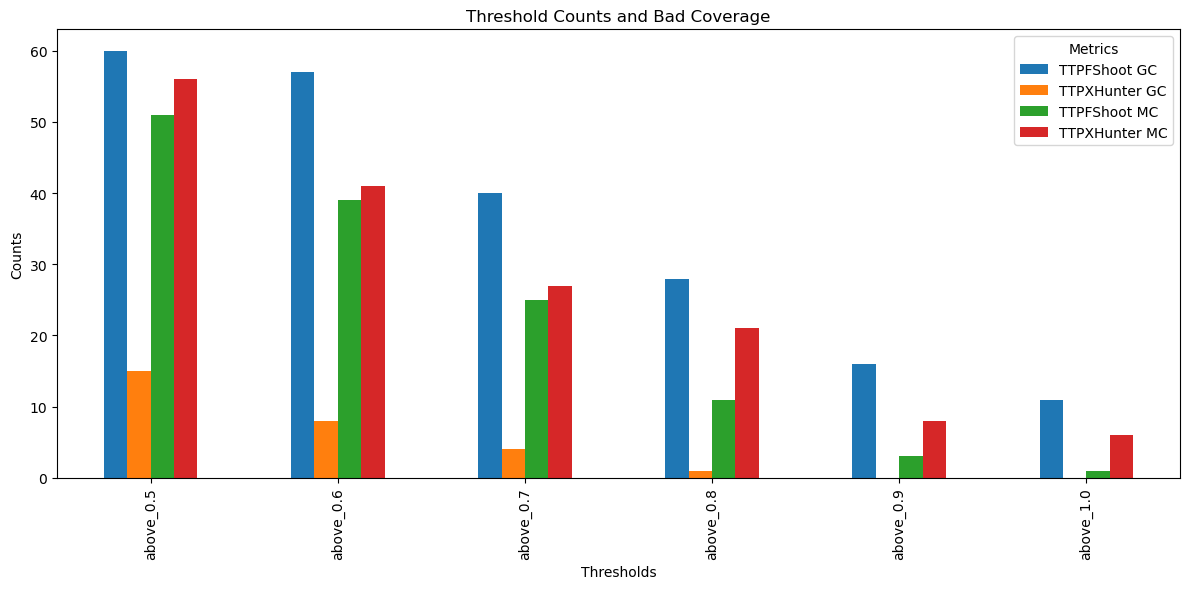

In [81]:
# Plot the data
merged_df.plot(kind='bar', figsize=(12, 6))
plt.title('Threshold Counts and Bad Coverage')
plt.xlabel('Thresholds')
plt.ylabel('Counts')
plt.legend(title='Metrics', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [82]:
merged_df.to_csv("./coverage_good_bad_all.csv")

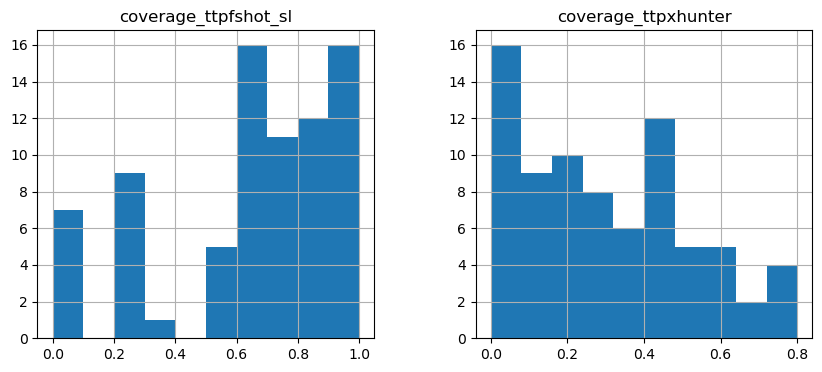

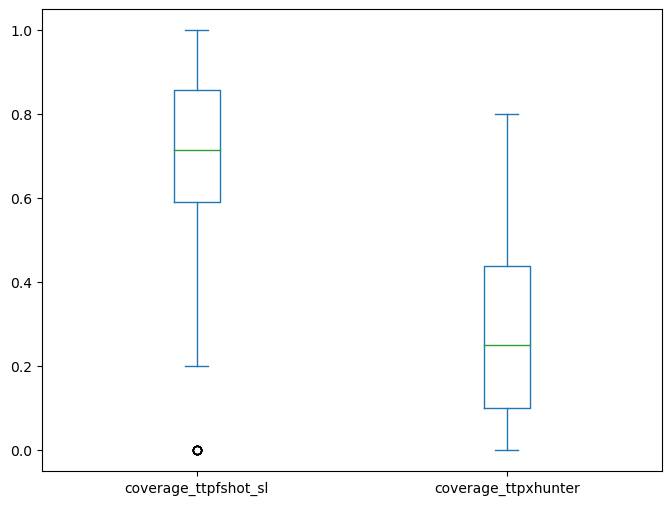

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
article_data[["coverage_ttpfshot_sl", "coverage_ttpxhunter"]].hist(bins=10, figsize=(10, 4))
plt.show()

# Box Plots
article_data[["coverage_ttpfshot_sl", "coverage_ttpxhunter"]].plot(kind='box', figsize=(8, 6))
plt.show()

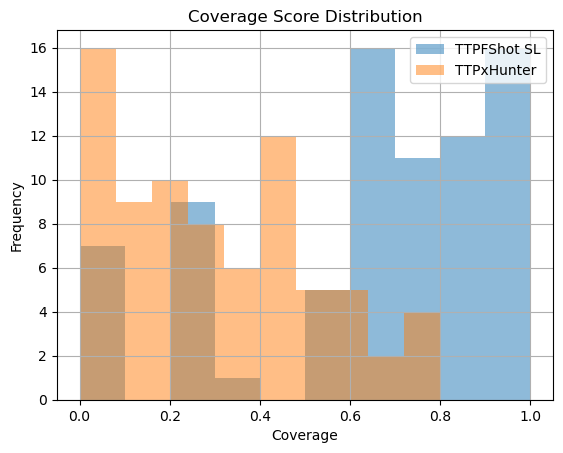

In [31]:
import matplotlib.pyplot as plt

article_data["coverage_ttpfshot_sl"].hist(bins=10, alpha=0.5, label="TTPFShot SL")
article_data["coverage_ttpxhunter"].hist(bins=10, alpha=0.5, label="TTPxHunter")
plt.legend()
plt.title("Coverage Score Distribution")
plt.xlabel("Coverage")
plt.ylabel("Frequency")
plt.show()

In [32]:
thresholds = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
for threshold in thresholds:
    count_ttp = (article_data["coverage_ttpfshot_sl"] >= threshold).sum()
    count_ttphunter = (article_data["coverage_ttpxhunter"] >= threshold).sum()
    print(f"Threshold {threshold}:")
    print(f"  TTPFShot SL: {count_ttp} samples")
    print(f"  TTPxHunter: {count_ttphunter} samples\n")

Threshold 0.5:
  TTPFShot SL: 60 samples
  TTPxHunter: 15 samples

Threshold 0.6:
  TTPFShot SL: 57 samples
  TTPxHunter: 8 samples

Threshold 0.7:
  TTPFShot SL: 40 samples
  TTPxHunter: 4 samples

Threshold 0.8:
  TTPFShot SL: 28 samples
  TTPxHunter: 1 samples

Threshold 0.9:
  TTPFShot SL: 16 samples
  TTPxHunter: 0 samples

Threshold 1.0:
  TTPFShot SL: 11 samples
  TTPxHunter: 0 samples



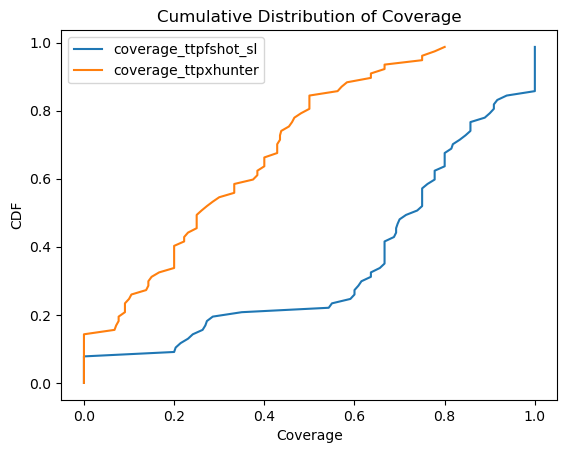

In [33]:
import numpy as np
# Plot CDF for each method
for column in ["coverage_ttpfshot_sl", "coverage_ttpxhunter"]:
    sorted_coverage = np.sort(article_data[column])
    cdf = np.arange(len(sorted_coverage)) / float(len(sorted_coverage))
    plt.plot(sorted_coverage, cdf, label=column)

plt.legend()
plt.xlabel("Coverage")
plt.ylabel("CDF")
plt.title("Cumulative Distribution of Coverage")
plt.show()

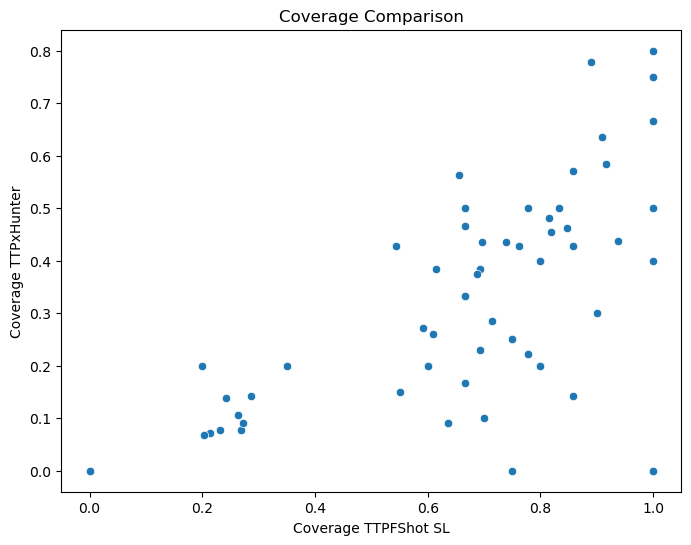

In [34]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x="coverage_ttpfshot_sl",
    y="coverage_ttpxhunter",
    data=article_data
)
plt.title("Coverage Comparison")
plt.xlabel("Coverage TTPFShot SL")
plt.ylabel("Coverage TTPxHunter")
plt.show()

In [35]:
from scipy.stats import ttest_rel, wilcoxon

# Perform paired t-test
t_stat, p_ttest = ttest_rel(article_data["coverage_ttpfshot_sl"], article_data["coverage_ttpxhunter"])

# Perform Wilcoxon signed-rank test
w_stat, p_wilcoxon = wilcoxon(article_data["coverage_ttpfshot_sl"], article_data["coverage_ttpxhunter"])

# Interpret the results for the paired t-test
if p_ttest <= 0.05:
    print(f"Paired t-test: Reject H0 (p = {p_ttest:.4f}). There is a statistically significant difference between the two columns.")
else:
    print(f"Paired t-test: Fail to Reject H0 (p = {p_ttest:.4f}). The two methods produce similar coverage ratios.")

# Interpret the results for the Wilcoxon test
if p_wilcoxon <= 0.05:
    print(f"Wilcoxon test: Reject H0 (p = {p_wilcoxon:.4f}). There is a statistically significant difference between the two columns.")
else:
    print(f"Wilcoxon test: Fail to Reject H0 (p = {p_wilcoxon:.4f}). The two methods produce similar coverage ratios.")


Paired t-test: Reject H0 (p = 0.0000). There is a statistically significant difference between the two columns.
Wilcoxon test: Reject H0 (p = 0.0000). There is a statistically significant difference between the two columns.


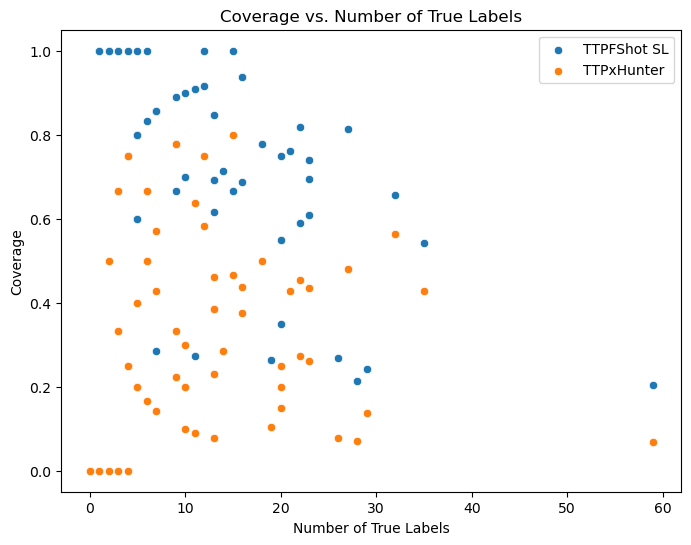

In [36]:
# Calculate number of true labels per sample
article_data['num_true_labels'] = article_data['TTPBF'].apply(len)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='num_true_labels',
    y='coverage_ttpfshot_sl',
    data=article_data,
    label='TTPFShot SL'
)
sns.scatterplot(
    x='num_true_labels',
    y='coverage_ttpxhunter',
    data=article_data,
    label='TTPxHunter'
)
plt.title("Coverage vs. Number of True Labels")
plt.xlabel("Number of True Labels")
plt.ylabel("Coverage")
plt.legend()
plt.show()


In [37]:
article_data

,Unnamed: 0.1,Unnamed: 0,RawText,TTP,CleanText,ttpxhunter,ttpfshot_sl,ttpfshot_ml,ttpfshot_zs,TTPB,ttpfshot_sl_B,TTPBF,ttpfshot_sl_BF,ttpxhunter_BF,coverage_ttpfshot_sl,coverage_ttpxhunter,num_true_labels
0,0,https://www.cisa.gov/news-events/cybersecurity...,\n\n\n\n\n\n\nActions to take today to mitigat...,"{T1106, T1133, T1219, T1027.009, T1490, T1003....",\n\n\n\n\n\n\nActions to take today to mitigat...,"[T1218, T1490, T1048, T1213, T1104, T1482, T15...","{T1059, T1204, T1069.002, T1219, T1005, T1070....","{'T1490', 'T1588.002', 'T1598.004', 'T1078.002...","{'T1490', 'T1552', 'T1048', 'T1620', 'T1563', ...","{T1059, T1204, T1106, T1003, T1133, T1219, T11...","{T1059, T1204, T1003, T1518, T1219, T1137, T10...","{T1059, T1204, T1106, T1003, T1055, T1547, T10...","{T1059, T1204, T1003, T1518, T1005, T1055, T15...","[T1218, T1547, T1140, T1560, T1553, T1071, T15...",0.695652,0.434783,23
1,1,https://www.cisa.gov/news-events/cybersecurity...,\n\n\n\nHow SVR-Attributed Actors are Adapting...,"{T1528, T1621, T1090.002, T1110, T1098.005, T1...",\n\n\n\nHow SVR-Attributed Actors are Adapting...,"[T1550, T1565, T1587, T1087, T1528, T1136, T16...","{T1556.009, T1586.003, T1591.004, T1204.001, T...","{'T1591.002', 'T1071.001', 'T1591.001', 'T1480...","{'T1550', 'T1071', 'T1090', 'T1111', 'T1078', ...","{T1090, T1098, T1528, T1621, T1078, T1110}","{T1204, T1098, T1665, T1591, T1527, T1110, T15...","{T1090, T1078}","{T1090, T1204, T1070, T1078, T1583, T1071, T15...","[T1087, T1120, T1119, T1553, T1090]",1.000000,0.500000,2
2,2,https://www.cisa.gov/news-events/cybersecurity...,\n\n\n\n\n\n\nActions to take today to mitigat...,"{T1133, T1087.002, T1083, T1213.002, T1021.002...",\n\n\n\n\n\n\nActions to take today to mitigat...,"[T1550, T1548, T1087, T1078, T1083, T1528, T10...","{T1484.001, T1556.009, T1098, T1133, T1190, T1...","{'T1555.006', 'T1556.009', 'T1588.002', 'T1078...","{'T1552', 'T1068', 'T1595', 'T1070', 'T1200', ...","{T1133, T1213, T1083, T1552, T1078, T1018, T10...","{T1518, T1098, T1133, T1190, T1068, T1087, T11...","{T1083, T1078, T1018, T1046, T1087, T1021}","{T1562, T1518, T1070, T1190, T1083, T1012, T15...","[T1548, T1087, T1078, T1083, T1190]",0.666667,0.500000,6
3,3,https://www.cisa.gov/news-events/cybersecurity...,\n\n\n\n\n\n\nActions to take today to mitigat...,"{T1059, T1003.003, T1518, T1133, T1033, T1120,...",\n\n\n\n\n\n\nActions to take today to mitigat...,"[T1565, T1218, T1490, T1550, T1552, T1129, T12...","{T1059, T1556.009, T1203, T1070.004, T1068, T1...","{'T1560.001, T1003.003', 'T1133', 'T1584', 'T1...","{'T1529', 'T0887', 'T1595', 'T1558', 'T1078', ...","{T1059, T1003, T1518, T1133, T1033, T1120, T11...","{T1059, T1203, T1068, T1087, T1589, T1580, T12...","{T1059, T1003, T1518, T1033, T1120, T1190, T11...","{T1059, T1518, T1003, T1190, T1203, T1005, T15...","[T1218, T1112, T1070, T1560, T1553, T1095, T10...",0.656250,0.562500,32
4,4,https://www.cisa.gov/news-events/cybersecurity...,\n\n\n\n\n\n\nActions to take today to mitigat...,"{T1027.010, TA0006, T1595.002, T1190, T1083, T...",\n\n\n\n\n\n\nActions to take today to mitigat...,"[T1071, T1594, T1083, T1593, T1102, T1530, T12...","{T1190, T1203, T1596.004, T1608.005, T1070.004...","{'T1555.006', 'T1552', 'T1071.001', 'T1584.001...","{'T1552', 'T1006', 'T1578', 'T1070', 'T1071', ...","{TA0006, T1059, T1190, T1083, T1114, T1552, T1...","{T1518, T1098, T1190, T1203, T1597, T1587, T15...","{T1059, T1190, T1083, T1078, T1583, T1505, T10...","{T1562, T1518, T1070, T1190, T1203, T1083, T10...","[T1071, T1083, T1102, T1573, T1583, T1553]",0.777778,0.222222,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,72,https://www.cisa.gov/news-events/cybersecurity...,\n\n\n\n\nSummary\n\nThis joint cybersecurity ...,"{T1133, TA0008, T1190, TA0003, T1078, TA0004, ...",\n\n\n\n\nSummary\n\nThis joint cybersecurity ...,"[T1550, T1565, T1049, T1021, T1528, T1498, T12...","{T1583.001, T1484.001, T1098, T1133, T1190, T1...","{'T1565', 'T1210, T107

### Relative improvement

In [38]:
article_data["relative_improvement"] = (
    (article_data["coverage_ttpfshot_sl"] - article_data["coverage_ttpxhunter"]) /
    article_data["coverage_ttpxhunter"].replace(0, np.nan)
) * 100  # Convert to percentage

# Handle infinite values (where coverage_ttpxhunter is 0)
article_data["relative_improvement"].replace([np.inf, -np.inf], np.nan, inplace=True)

# Summary statistics
improvement_stats = article_data["relative_improvement"].describe()
print(improvement_stats)

count     65.000000
mean     149.002818
std      135.628197
min        0.000000
25%       60.000000
50%      100.000000
75%      200.000000
max      600.000000
Name: relative_improvement, dtype: float64


/tmp/ipykernel_1122909/3572438576.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  article_data["relative_improvement"].replace([np.inf, -np.inf], np.nan, inplace=True)


In [39]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import multilabel_confusion_matrix


# Binarize the labels
mlb = MultiLabelBinarizer()
y_true_bin = mlb.fit_transform(article_data["TTPBF"])
y_pred_bin = mlb.transform(article_data["ttpfshot_sl_BF"])

# Compute per-label confusion matrices
confusion_matrices = multilabel_confusion_matrix(y_true_bin, y_pred_bin)

# Aggregate the confusion matrix
aggregate_cm = confusion_matrices.sum(axis=0)

# Extract components
tn, fp, fn, tp = aggregate_cm.ravel()

print("Aggregate Confusion Matrix:")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")


Aggregate Confusion Matrix:
True Negatives (TN): 3148
False Positives (FP): 901
False Negatives (FN): 334
True Positives (TP): 545


In [40]:
accuracy = (tp + tn) / (tp + tn + fp + fn)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.7494


In [41]:
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
print(f"Precision: {precision:.4f}")


Precision: 0.3769


In [42]:
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
print(f"Recall: {recall:.4f}")


Recall: 0.6200


In [43]:
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
print(f"F1-Score: {f1_score:.4f}")


F1-Score: 0.4688


In [44]:
# Binarize the labels
mlb = MultiLabelBinarizer()
y_true_bin = mlb.fit_transform(article_data["TTPBF"])
y_pred_bin = mlb.transform(article_data["ttpxhunter_BF"])

# Compute per-label confusion matrices
confusion_matrices = multilabel_confusion_matrix(y_true_bin, y_pred_bin)

# Aggregate the confusion matrix
aggregate_cm = confusion_matrices.sum(axis=0)

# Extract components
tn, fp, fn, tp = aggregate_cm.ravel()

print("Aggregate Confusion Matrix:")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")

accuracy = (tp + tn) / (tp + tn + fp + fn)
print(f"Accuracy: {accuracy:.4f}")

precision = tp / (tp + fp) if (tp + fp) > 0 else 0
print(f"Precision: {precision:.4f}")

recall = tp / (tp + fn) if (tp + fn) > 0 else 0
print(f"Recall: {recall:.4f}")

f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
print(f"F1-Score: {f1_score:.4f}")

Aggregate Confusion Matrix:
True Negatives (TN): 3547
False Positives (FP): 502
False Negatives (FN): 597
True Positives (TP): 282
Accuracy: 0.7770
Precision: 0.3597
Recall: 0.3208
F1-Score: 0.3391
